# Sample solutions for Virtual Orrery

Below are 3 possible solution to the orrery challenge exercise, with different levels of complexity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import random

In [2]:
## Individual planets (Earth, Mercury)

au = 1.496e8
year = 365.256

# Orbital constants for Earth and Mercury
d_e = 1 * au
p_e = 1 * year
d_m = 0.387 * au
p_m = 87.969

# 1 Year of timepoints, at 5 day intervals
t = np.arange(0, year, 5)

# Position coordinates for Earth and Mercury for each timepoint in t
x_e = d_e * np.cos(2*np.pi*t/p_e)
y_e = d_e * np.sin(2*np.pi*t/p_e)
x_m = d_m * np.cos(2*np.pi*t/p_m)
y_m = d_m * np.sin(2*np.pi*t/p_m)


# Set up the figure
filename = "animation.gif"
interval = 100
frames = len(t)

def ganimate(frame):
    plt.cla()
    # Plot a yellow circle in the middle to represent the Sun
    plt.plot(0,0, 'oy')
    # Plot orbital positions of Earth and Mercury for current frame
    plt.scatter(x_e[frame], y_e[frame])
    plt.scatter(x_m[frame], y_m[frame])
    # Set the axis limits to the minimum and maximum x,y coordinates of Earth
    plt.xlim(min(x_e), max(x_e))
    plt.ylim(min(y_e), max(y_e))

fig = plt.figure(figsize=(5, 5))
anim = animation.FuncAnimation(fig, ganimate, frames=frames, interval=interval)
anim.save(filename, writer='imagemagick')
plt.close()

__counter__ = str(random.randint(0,2e9))
display(HTML('<img src="' + filename + '?' + __counter__ + '">'))

If we want to plot many planets, using arrays and loops can save us many lines of code

In [3]:
## Inner planets: Using arrays and for loops

au = 1.496e8
year = 365.256

# Inner planets only
distances = np.array([[0.387, 0.723, 1, 1.524]]) * au
periods = np.array([[87.969, 224.701, 1*year, 686.98]])

# Make animation last for full orbit of Mars, 10 day intervals
# (N.B.: [:, np.newaxis] is needed for succesful broadcasting)
t = np.arange(0, np.amax(periods), 10)[:, np.newaxis]

# Compute orbital coordinates
x_planets = distances * np.cos(2*np.pi*t/periods)
y_planets = distances * np.sin(2*np.pi*t/periods)

# Set up figure
filename = "animation.gif"
interval = 100
frames = len(t)

def ganimate(frame):
    plt.cla()
    
    # Plot a yellow circle in the middle to represent the Sun
    plt.plot(0,0, 'oy')
    
    # Create a line highlighting the orbit of Earth
    plt.plot(x_planets[:,2], y_planets[:,2], linewidth=0.5)
    
    # For each planet, plot its current position for the frame
    for p in range(max(periods.shape)):
        plt.scatter(x_planets[frame, p], y_planets[frame, p])
    
    # Set axis limits to correspond to the minimum and maximum x and y positions
    # out of all planet orbits
    plt.xlim(np.amin(x_planets), np.amax(x_planets))
    plt.ylim(np.amin(y_planets), np.amax(y_planets))
    
fig = plt.figure(figsize=(5, 5))

anim = animation.FuncAnimation(fig, ganimate, frames=frames, interval=interval)
anim.save(filename, writer='imagemagick')
plt.close()

__counter__ = str(random.randint(0,2e9))
display(HTML('<img src="' + filename + '?' + __counter__ + '">'))

Finally, if we want to animate the entire solar system, we'll need to make sure we have a sensible number of frames.

> Use `np.arange` to create an array of values with an interval which you define yourself: `np.arange(start, stop, step)`

> Use `np.linspace` to create an array with a defined number of evenly spaced values: `np.linspace(start, stop, nvals)`.

CalledProcessError: Command '['convert', '-size', '576x576', '-depth', '8', '-delay', '10.0', '-loop', '0', 'rgba:-', 'animation.gif']' returned non-zero exit status 2.

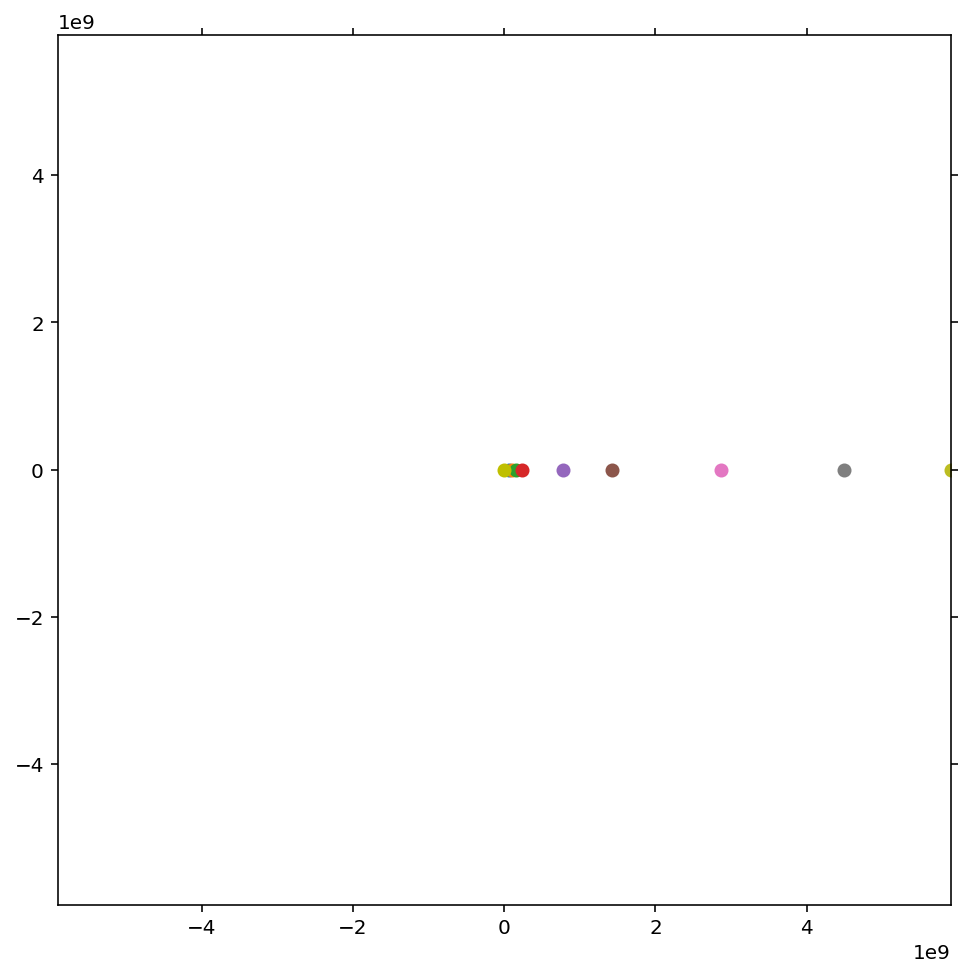

In [4]:
## Entire solar system

au = 1.496e8
year = 365.256

distances = np.array([[0.387, 0.723, 1, 1.524,        # Inner planets
                       5.203, 9.537, 19.191, 30.069,  # Outer planets
                       39.482]]) * au                 # Pluto :)
periods = np.array([[87.969, 224.701, 1*year, 686.98,
                     11.862*year, 29.457*year, 84.011*year, 164.79*year,
                     247.94*year]])

# Make animation last for full orbit of Pluto, Using np.linspace() to generate 200 values
# (N.B.: [:, np.newaxis] is needed for succesful broadcasting)
t = np.linspace(0, np.amax(periods), 200)[:, np.newaxis]

# Compute orbital coordinates
x_planets = distances * np.cos(2*np.pi*t/periods)
y_planets = distances * np.sin(2*np.pi*t/periods)

# Set up figure
filename = "animation.gif"
interval = 100
frames = len(t)

def ganimate(frame):
    plt.cla()
    
    # Plot a yellow circle in the middle to represent the Sun
    plt.plot(0,0, 'oy')
    
    # For each planet, plot its current position for the frame
    for p in range(max(periods.shape)):
        plt.scatter(x_planets[frame, p], y_planets[frame, p])
    
    # Set axis limits to correspond to the minimum and maximum x and y positions
    # out of all planet orbits
    plt.xlim(np.amin(x_planets), np.amax(x_planets))
    plt.ylim(np.amin(y_planets), np.amax(y_planets))
    
fig = plt.figure(figsize=(8, 8))
anim = animation.FuncAnimation(fig, ganimate, frames=frames, interval=interval)
anim.save(filename, writer='imagemagick')
plt.close()

__counter__ = str(random.randint(0,2e9))
display(HTML('<img src="' + filename + '?' + __counter__ + '">'))